Transfer Learning of Resnet50 on Dataset: Dangerous Farm Insects


# Preparing the Data


<span style="color:green">Ang ato dataset kay mo classify ug 15 dangerous farm insects. naay extra code diha kanang ResNet_50 for reference</span>


1. Importing package


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import cv2
import random
import pathlib
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2. Download the dataset and print the path


In [ ]:
# Download latest version
path = kagglehub.dataset_download("tarundalal/dangerous-insects-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Uriel\.cache\kagglehub\datasets\tarundalal\dangerous-insects-dataset\versions\1


In [90]:
print(path)

C:\Users\Uriel\.cache\kagglehub\datasets\tarundalal\dangerous-insects-dataset\versions\1


3. Check to see if dataset is there


In [145]:
import pathlib

# Convert path to pathlib object
data_dir = pathlib.Path(path)

# Access the "Aphids" folder
aphids_dir = data_dir / "farm_insects/Aphids"  # Adjust if folder name is different

# Print folder path and check contents
print("Aphids folder path:", aphids_dir)
print("Files inside:", list(aphids_dir.glob("*.jpg")))  # List files inside




Aphids folder path: C:\Users\Uriel\.cache\kagglehub\datasets\tarundalal\dangerous-insects-dataset\versions\1\farm_insects\Aphids
Files inside: [WindowsPath('C:/Users/Uriel/.cache/kagglehub/datasets/tarundalal/dangerous-insects-dataset/versions/1/farm_insects/Aphids/Image_10.jpg'), WindowsPath('C:/Users/Uriel/.cache/kagglehub/datasets/tarundalal/dangerous-insects-dataset/versions/1/farm_insects/Aphids/Image_100.jpg'), WindowsPath('C:/Users/Uriel/.cache/kagglehub/datasets/tarundalal/dangerous-insects-dataset/versions/1/farm_insects/Aphids/Image_101.jpg'), WindowsPath('C:/Users/Uriel/.cache/kagglehub/datasets/tarundalal/dangerous-insects-dataset/versions/1/farm_insects/Aphids/Image_102.jpg'), WindowsPath('C:/Users/Uriel/.cache/kagglehub/datasets/tarundalal/dangerous-insects-dataset/versions/1/farm_insects/Aphids/Image_103.jpg'), WindowsPath('C:/Users/Uriel/.cache/kagglehub/datasets/tarundalal/dangerous-insects-dataset/versions/1/farm_insects/Aphids/Image_11.jpg'), WindowsPath('C:/Users/Ur

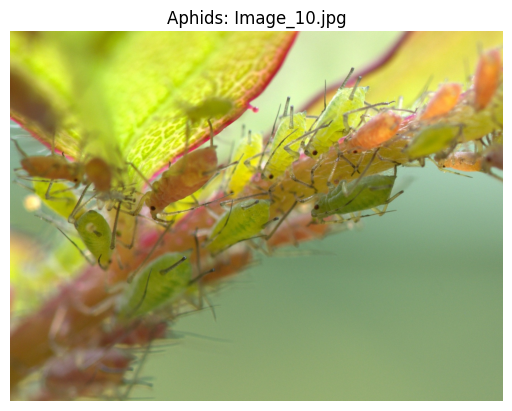

In [146]:
# Get all images from the "Aphids" folder
aphids_images = list(aphids_dir.glob("*"))  # Adjust the pattern if needed

img_path = aphids_images[1]  # Change index to select a different image

# Open and display the image using PIL
img = PIL.Image.open(str(img_path))

# Show image using Matplotlib
plt.imshow(img)
plt.axis("off")
plt.title(f"Aphids: {img_path.name}")
plt.show()


4. Split data for training and testing/validation


In [147]:
#resnet50 uses 224x224 images
img_height, img_width = 224, 224
batch_size = 32

In [148]:
# Load Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir / "farm_insects",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1591 files belonging to 15 classes.
Using 1273 files for training.


In [149]:
# Load Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir / "farm_insects",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1591 files belonging to 15 classes.
Using 318 files for validation.


In [150]:
class_names = train_ds.class_names
print(class_names)

['Africanized Honey Bees (Killer Bees)', 'Aphids', 'Armyworms', 'Brown Marmorated Stink Bugs', 'Cabbage Loopers', 'Citrus Canker', 'Colorado Potato Beetles', 'Corn Borers', 'Corn Earworms', 'Fall Armyworms', 'Fruit Flies', 'Spider Mites', 'Thrips', 'Tomato Hornworms', 'Western Corn Rootworms']


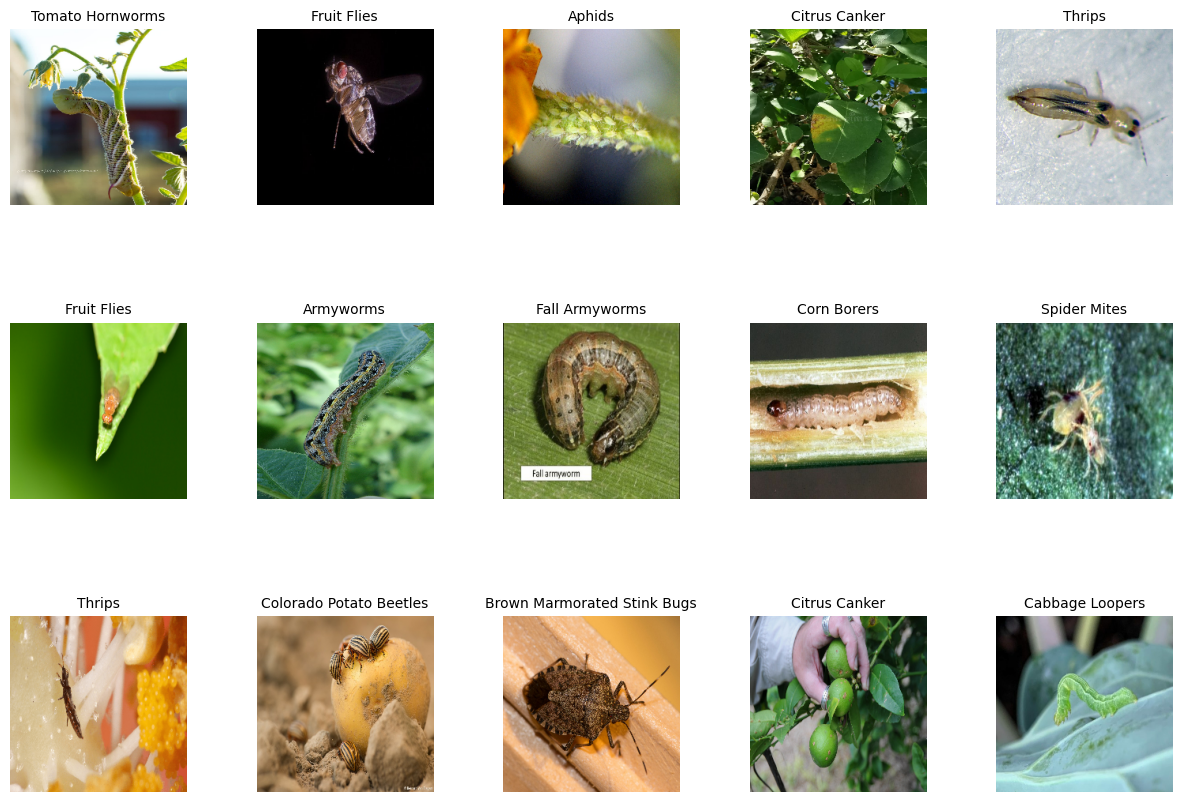

In [161]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 10))

# Take one batch from train_ds
for images, labels in train_ds.take(1):
    for i in range(15):  # Show 15 images
        ax = plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert to uint8 for display
        plt.title(class_names[labels[i].numpy()], fontsize=10)  # Adjust font size
        plt.axis("off")

# Add spacing between images
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Wider spacing

plt.show()


# Training the model with the use of Resnet50


glhf
